# Machine Learning applied to House Prices Prediction

###Data fields  
Here's a brief version of what you'll find in the data description file.  

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date   
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms    
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale   
SaleCondition: Condition of sale  

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import skew

##Exploratory Data Analysis

In [3]:
X_t = pd.read_csv('https://raw.githubusercontent.com/leovcunha/house-prices-advanced-regression/master/data/train.csv')
X_predict = pd.read_csv('https://raw.githubusercontent.com/leovcunha/house-prices-advanced-regression/master/data/test.csv')
X_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_t.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Handling missing values:  


---



In [0]:
y_train = X_t.SalePrice.values
X_t = X_t.drop(['SalePrice'],axis=1)
X_train2 = pd.concat((X_t, X_predict)).reset_index(drop=True)


In [6]:
missing_data = X_train2.isnull().sum().sort_values(ascending=False)
missing_data=missing_data[missing_data.values > 0]
print(missing_data)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


In [7]:
[X_train2[x].fillna('No', inplace=True) if X_train2[x].dtype == np.object else X_train2[x].fillna(0, inplace=True) for x in missing_data.index]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
X_train2.sample(n=20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
911,912,20,RL,0.0,9286,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,0,10,2009,WD,Normal
1663,1664,20,RL,105.0,13693,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,3,2009,WD,Normal
1151,1152,20,RL,134.0,17755,Pave,No,Reg,Lvl,AllPub,...,100,0,No,No,No,0,11,2006,WD,Normal
1682,1683,120,RL,48.0,3480,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,11,2009,WD,Normal
787,788,60,RL,76.0,10142,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,0,1,2010,WD,Normal
1502,1503,20,FV,57.0,12853,Pave,Pave,IR1,Lvl,AllPub,...,0,0,No,No,No,0,4,2010,New,Partial
715,716,20,RL,78.0,10140,Pave,No,Reg,Lvl,AllPub,...,0,0,No,MnPrv,No,0,8,2009,WD,Normal
1072,1073,50,RL,50.0,7585,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,8,2006,WD,Normal
348,349,160,RL,36.0,2448,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,10,2008,WD,Normal
1742,1743,160,FV,35.0,3768,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,9,2009,WD,Normal


In [9]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non

## Correlation Analysis   
something great and freshly learned:



In [0]:
X_t[X_train2.columns] = X_train2.iloc[0:1459]
X_t['SalePrice'] = y_train


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


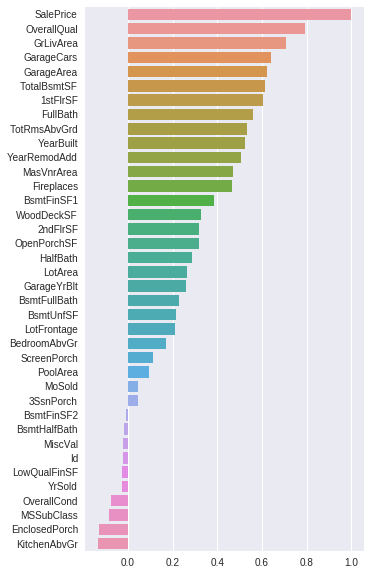

In [12]:
corr = X_t.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)
plt.figure(figsize=(5,10))
sns.barplot(corr['SalePrice'].values, corr['SalePrice'].index)

Instead of looking into the ones that are highly correlated we'll look into those features that are lowly correlated

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


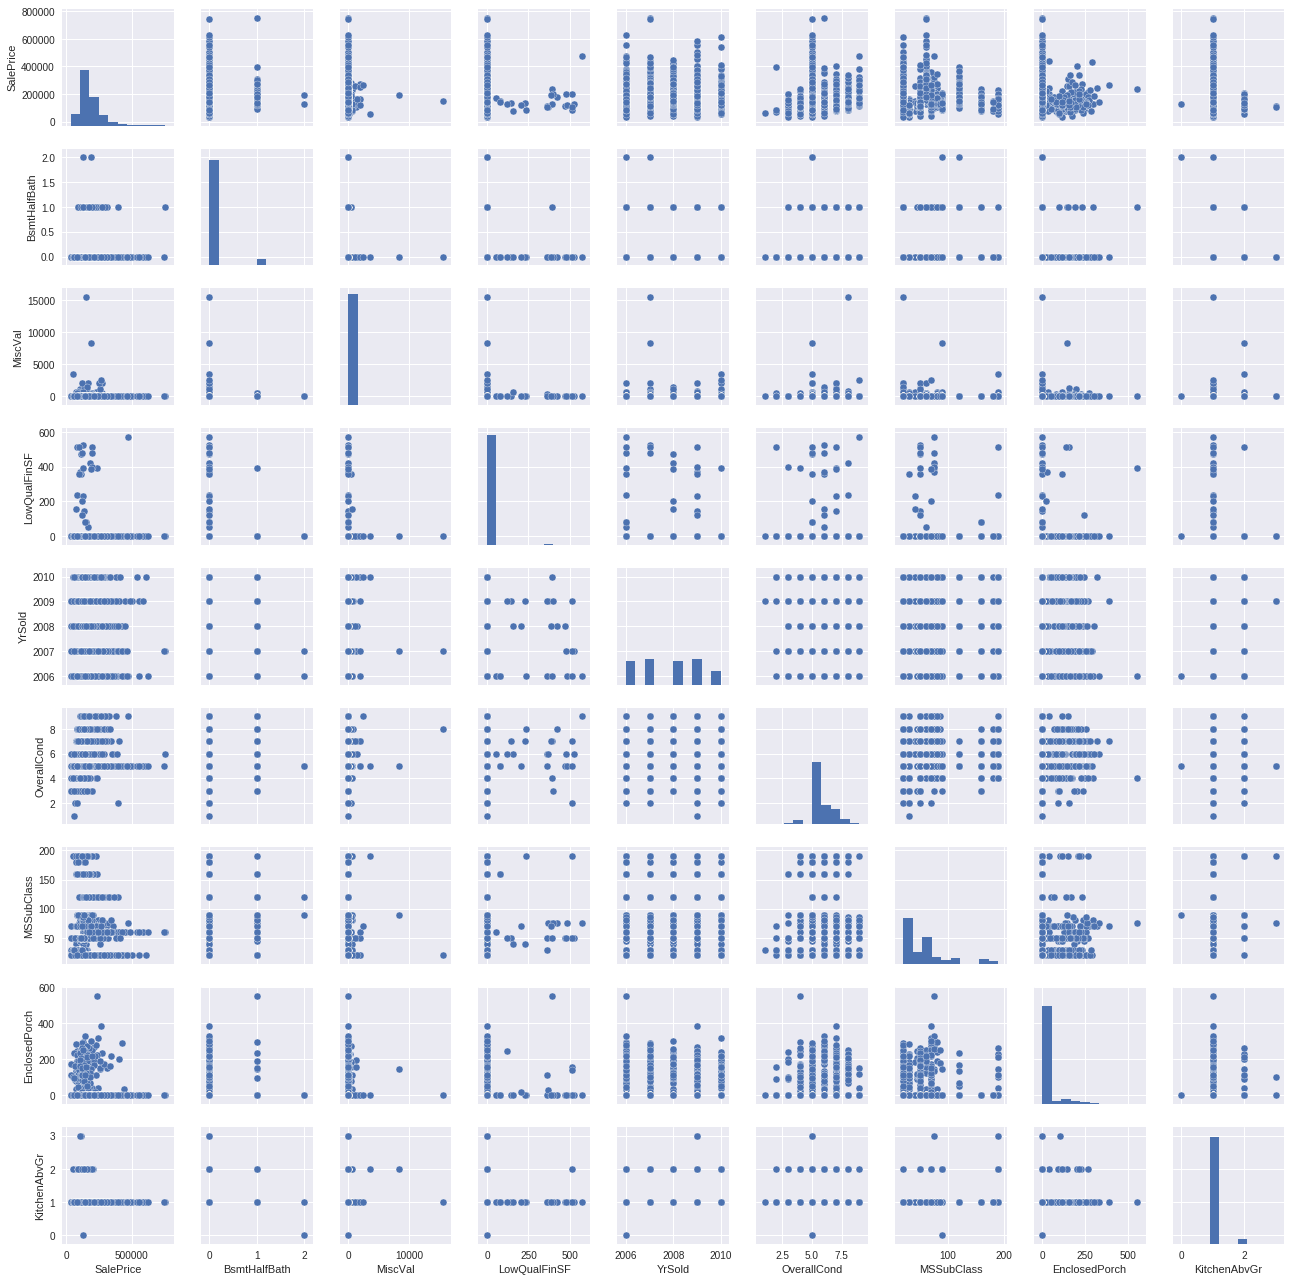

In [15]:
sns.pairplot(X_t[['SalePrice','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']], size = 2);

Basement Half Bath, LowQualFinSF,  is correlating inversely with the sell price it means less of these higher the price.  
Yearsold, miscVal, enclosedporch and others not correlating are dropped

In [0]:
X_train2 = X_train2.drop(['MiscVal','YrSold','OverallCond','EnclosedPorch'], axis=1);

MSSubClass is in reality categorical class need to be dealt with


In [0]:
X_train2['MSSubClass'] = X_train2['MSSubClass'].astype(str)

### Fixing "skewed" features.  
For your coefficients to be interpretable, linear regression assumes a bunch of things.
One of these things is **no multicollinearity**. That is, your X variables should not be correlated against each other.
Another is Homoscedasticity. The errors your model commits should have the same variance, i.e. you should ensure the** linear regression does not make small errors for low values of X and big errors for higher values of X**. In other words, the difference between what you predict Y^ and the true values Y should be constant. You can **ensure that by making sure that Y follows a Gaussian distribution.** (The proof is highly mathematical.)

Depending on your data, you may be able to make it Gaussian. Typical transformations are taking the inverse, the logarithm or square roots. Many others exist of course, it all depends on your data. You have to look at your data, and then do a histogram or run a normality test, such as the Shapiro-Wilk test.

These are all techniques to build an unbiased estimator. I don't think it has anything to do with convergence as others have said (sometimes you may also want to normalize your data, but that is a different topic).

Following the linear regression assumptions is important if you want to either interpret the coefficients or if you want to use statistical tests in your model. Otherwise, forget about it.

Applying the logarithm or normalizing your data, is also important because linear regression optimization algorithms typically minimize ∥y^−y∥2, so if you have some big y outliers, your estimator is going to be VERY concerned about minimizing those, since it is concerned about the squared error, not absolute error. Normalizing your data is important in those case and this is why scikit-learn has a normalize option in the LinearRegression constructor.

(https://datascience.stackexchange.com/questions/20237/why-do-we-convert-skewed-data-into-a-normal-distribution)



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


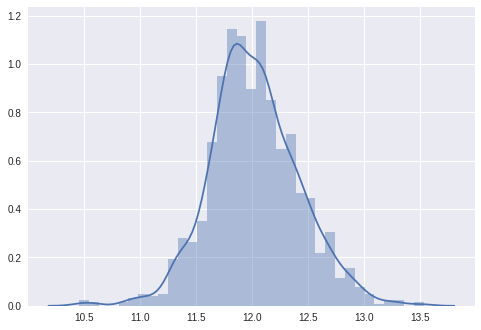

In [18]:
y_train = np.log1p(y_train)
sns.distplot(y_train);

In [19]:
numeric_feats = X_train2.dtypes[X_train2.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = X_train2[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254


In [0]:
from scipy.special import boxcox1p
for feat in skewness.index:
    X_train2[feat] = boxcox1p(X_train2[feat], 0.15)
    X_train2[feat] += 1

In [21]:
X_train2 = pd.get_dummies(X_train2)
print(X_train2.shape)

(2919, 322)


In [22]:
X_train2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 322 entries, Id to SaleCondition_Partial
dtypes: float64(32), uint8(290)
memory usage: 1.5 MB


In [0]:
X = X_train2[:1460]
X_predict = X_train2[1460:]
y = y_train

In [24]:
X.sample(n=20)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_No,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
475,11.147932,7.221214,20.225942,3.055642,15.124553,15.124553,1.000000,11.868631,1.000000,10.322355,...,0,0,0,1,0,0,0,0,1,0
1153,13.533104,1.000000,18.848627,3.259674,15.071773,15.193765,1.000000,11.458983,1.000000,9.848247,...,0,0,0,1,0,0,0,0,1,0
115,7.952064,5.697012,16.736494,3.259674,15.181278,15.181278,13.470186,10.829998,1.000000,10.103010,...,0,0,0,1,0,0,0,0,1,0
432,10.911336,5.137711,15.055628,3.055642,15.137234,15.137234,10.564881,11.121375,1.000000,9.978567,...,0,0,0,1,0,0,0,0,1,0
946,12.972650,6.968981,20.078410,3.055642,15.118196,15.118196,8.152988,12.325398,9.978567,7.694191,...,0,0,0,1,0,0,0,0,1,0
1180,13.599768,1.000000,21.318341,3.440268,15.167178,15.168748,1.000000,13.684285,1.000000,1.000000,...,0,0,0,1,0,0,0,0,1,0
1208,13.667548,6.968981,19.885137,3.055642,15.122965,15.151449,1.000000,11.292420,7.808145,10.170637,...,0,0,0,1,0,0,0,0,1,0
1255,13.778382,6.426781,19.061782,3.259674,15.073384,15.103852,1.000000,10.865135,1.000000,11.056650,...,0,0,0,1,0,0,0,0,1,0
747,12.325398,6.831328,21.506621,3.440268,14.990324,15.187527,1.000000,1.000000,1.000000,13.741053,...,0,0,0,1,0,0,0,0,1,0
1425,14.151904,7.221214,21.152798,3.259674,15.118196,15.118196,9.539411,1.000000,1.000000,13.769088,...,0,0,0,1,0,0,0,0,1,0


## Modelling and predictions



In [0]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

#### Ridge Regression

In [27]:
alphas = np.arange(0.1, 50, 0.2)
ridge = RidgeCV(alphas)
ridge.fit(X_train, y_train)
ridge_train_score = rmse_cv_train(ridge)
ridge_test_score = rmse_cv_test(ridge)
print('train score', ridge_train_score.mean())
print('test score', ridge_test_score.mean())

train score 0.13023573117678353
test score 0.16142503715504458


#### Lasso

In [28]:
#Lasso
alphas = np.logspace(-4, 1, 13)
lasso = LassoCV(alphas=alphas, max_iter=50000, cv = 10)
lasso.fit(X_train, y_train)
print('train score',  rmse_cv_train(lasso).mean())
print('test score', rmse_cv_test(lasso).mean())

train score 0.1272386230360833
test score 0.15218165168837244


#### ElasticNet

In [29]:
elasticNet = ElasticNetCV(l1_ratio=[.8, .9, .95, .975, .99, .999, 1], max_iter=50000, cv=10)
elasticNet.fit(X_train, y_train)
print('train score',  rmse_cv_train(elasticNet).mean())
print('test score', rmse_cv_test(elasticNet).mean())

train score 0.12672074606628775
test score 0.1497346874882878


##### Important Coefficients (ElasticNet)

In [30]:
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
print(imp_coefs)

Condition2_PosN         -0.460011
MSZoning_C (all)        -0.285524
SaleCondition_Abnorml   -0.085875
CentralAir_N            -0.075607
ExterCond_Fa            -0.056437
Neighborhood_IDOTRR     -0.044037
MSSubClass_30           -0.042170
Exterior1st_Wd Sdng     -0.039538
Foundation_BrkTil       -0.036680
Neighborhood_Edwards    -0.036469
BsmtQual_Ex              0.052563
Neighborhood_BrkSide     0.052873
Neighborhood_NridgHt     0.053617
Condition1_Norm          0.060109
Neighborhood_NoRidge     0.071646
KitchenQual_Ex           0.082710
Functional_Typ           0.095138
GrLivArea                0.126896
Neighborhood_Crawfor     0.134133
OverallQual              0.296307
dtype: float64


#### Random Forest Regressor

GridSearchCV to select the best hyperparameters for the model.

In [31]:
param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}
model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8496887753198649
{'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
rfRegressor = RandomForestRegressor(bootstrap=False, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
rfRegressor.fit(X_train, y_train)
print('train score',  rmse_cv_train(rfRegressor).mean())
print('test score', rmse_cv_test(rfRegressor).mean())


train score 0.15478856246458428
test score 0.16005084407176723


### Predictions

In [0]:
ridge_pred = np.expm1(ridge.predict(X_predict))
lasso_pred = np.expm1(lasso.predict(X_predict))
eln_pred = np.expm1(elasticNet.predict(X_predict))
rf_pred = np.expm1(rfRegressor.predict(X_predict))
sum = 0.1614 + 0.1521 + 0.1497 + 0.1600
ridge_weight = sum/0.1614
lasso_weight = sum/0.1521
eln_weight = sum/0.1497
rf_weight = sum/0.1600


In [0]:
ensemble = ridge_pred * ridge_weight + lasso_pred * lasso_weight + rf_pred * rf_weight

In [0]:
X_sub = pd.read_csv('https://raw.githubusercontent.com/leovcunha/house-prices-advanced-regression/master/data/test.csv')
submission = pd.DataFrame({
        "Id": X_sub["Id"],
        "SalePrice": ensemble
    })


In [56]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 7.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [57]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
uploaded = drive.CreateFile({'title': 'submission.csv'})
uploaded.SetContentString(submission.to_csv(index=False))
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1jRqoIL6F2W5b-6srgV52ze1cMz5Mwta5
